# Mid-Course Project



### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which focuses on increasing the sales of the company and maximising profit. 

Before the management team of the company can take any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.

As their Data Analyst,you are presented with their four year daily sales records (**superstore data.csv**).

#### Task
Analyse the given  data and advise management on what to do to increase sales and profit as intended in the compaign.

Kindly  outlay your analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.


Management expects statistical summaries of the key variables considering the aim of the campaign, visualizations and a report on your findings and your advice.

**Use Powerpoint or any other presentation application for your presentation.**

Good Luck !








# CROSS INDUSTRY STANDARD PROCESS - (CRISP)

In [ ]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [ ]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [71]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Month_name,unit_price,discount_value
0,object,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1,January,204.15,0.000
1,object,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1,January,44.58,13.374
2,object,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1,January,16.53,0.000


In [72]:
data[data['Product Name']=='Tenex Lockers, Blue']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Month_name,unit_price,discount_value
0,object,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3000,2,0.00,106.1400,35.46,Medium,1,January,204.15,0.0000
192,object,IN-2011-25070,2011-01-09,2011-06-09,Standard Class,MN-17935,Michael Nguyen,Consumer,Hefei,Anhui,China,APAC,North Asia,OFF-ST-10003295,Office Supplies,Storage,"Tenex Lockers, Blue",1429.0500,7,0.00,371.4900,194.36,High,1,January,204.15,0.0000
1150,object,SA-2011-1570,2011-04-08,2011-09-08,Standard Class,RH-9555,Ritsa Hightower,Consumer,Riyadh,Ar Riyad,Saudi Arabia,EMEA,EMEA,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",204.1500,1,0.00,53.0700,8.70,Medium,4,April,204.15,0.0000
1405,object,IZ-2011-2730,2011-05-09,2011-07-09,First Class,CA-2310,Christine Abelman,Corporate,Mosul,Ninawa,Iraq,EMEA,EMEA,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",204.1500,1,0.00,53.0700,23.68,High,5,May,204.15,0.0000
2655,object,IN-2011-27534,2011-09-11,2011-10-11,First Class,MH-17785,Maya Herman,Corporate,Bandung,Jawa Barat,Indonesia,APAC,Southeast Asia,OFF-ST-10003295,Office Supplies,Storage,"Tenex Lockers, Blue",677.7780,4,0.17,73.4580,153.25,High,9,September,204.15,138.8220
2845,object,IT-2011-4648014,2011-10-06,2011-06-16,Standard Class,AH-10075,Adam Hart,Corporate,Aprilia,Lazio,Italy,EU,South,OFF-ST-10004191,Office Supplies,Storage,"Tenex Lockers, Blue",489.9600,4,0.40,-114.3600,7.35,Medium,10,October,204.15,326.6400
3518,object,CG-2011-9940,2011-12-12,2011-12-16,Standard Class,AZ-750,Annie Zypern,Consumer,Kinshasa,Kinshasa,Democratic Republic of the Congo,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",204.1500,1,0.00,53.0700,12.82,Medium,12,December,204.15,0.0000
4559,object,IT-2012-2733319,2012-03-12,2012-05-12,First Class,HA-14920,Helen Andreada,Consumer,Trieste,Friuli-Venezia Giulia,Italy,EU,South,OFF-ST-10004191,Office Supplies,Storage,"Tenex Lockers, Blue",122.4900,1,0.40,-28.5900,13.21,Critical,3,March,204.15,81.6600
4755,object,ES-2012-4868521,2012-04-08,2012-06-08,First Class,AH-10075,Adam Hart,Corporate,Flers,Lower Normandy,France,EU,Central,OFF-ST-10004191,Office Supplies,Storage,"Tenex Lockers, Blue",183.7350,1,0.10,32.6550,36.88,High,4,April,204.15,20.4150
5201,object,TU-2012-3470,2012-05-11,2012-05-11,Same Day,JL-5850,John Lucas,Consumer,Denizli,Denizli,Turkey,EMEA,EMEA,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",489.9600,6,0.60,-416.5200,94.14,High,5,May,204.15,734.9400


In [73]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority
Month
Month_name
unit_price
discount_value


### Hints on Data preparation and exploration 

1. Load the data.
2. Inspect the data
3. Check for missing values
4. Check the data of each column
5. Check the different categories in the categorical variables
6. Take a view of the data
7. Take the descritive statistics for the numerical variables
9. Check the ditribution of the variables
10. Feature Engineering
#Create columns for:

#Unit price (sale/quantity)

#Year

#Month

#interval between the order date and the shipping date in days.


# Reviewing of data

In [74]:
#This is to help us identify the Datatypes as well as the null values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  object        
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [70]:
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Month_name,unit_price,discount_value
0,object,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium,1,January,204.15,0.000
1,object,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium,1,January,44.58,13.374
2,object,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High,1,January,16.53,0.000
3,object,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High,1,January,29.91,44.865
4,object,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium,1,January,25.26,12.630
5,object,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium,1,January,30.69,6.138
6,object,IN-2011-30733,2011-01-02,2011-03-02,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,Bangladesh,APAC,Central Asia,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical,1,January,142.89,0.000
7,object,CA-2011-115161,2011-01-02,2011-03-02,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,United States,US,West,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Finish",290.666,2,0.15,3.4196,54.64,High,1,January,170.98,51.294
8,object,AO-2011-1390,2011-01-02,2011-04-02,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,Angola,Africa,Africa,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical,1,January,206.40,0.000
9,object,ID-2011-56493,2011-01-02,2011-03-02,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,China,APAC,North Asia,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical,1,January,54.24,0.000


# Per the info metadata on the dataset, we can deduce that
1. The dataset is made up of 24 columns
2. These columns are spread to the various datatypes datetime64, float64, int64 and object
3. The postal code column,has missing values in the dataset

In [75]:
#This shows that, the dataset is made up of 51290 rows and 24 columns
data.shape

(51290, 27)

In [76]:
#This code helps us to the Identify the missing values in the dataset.
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Month             0
Month_name        0
unit_price        0
discount_value    0
dtype: int64

In [77]:
data['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [78]:
data['Row ID'].nunique()

1

# CLEANING DATA FOR ANALYSIS

#Datatype Constraints

In [79]:
new_dtype_of_rowid = data['Row ID'].astype('object')

In [ ]:
data['Row ID'] = new_dtype_of_rowid.dtype

In [82]:
assert data['Row ID'].dtype == 'object'

In [83]:
data.dtypes

Row ID                    object
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
Month                      int64
Month_name                object
unit_price               float64
discount_value           float64
dtype: object

In [ ]:
#Dropping Postal Code column
data.drop('Postal Code', axis = 1, inplace = True)

In [ ]:
for col in data.columns:
    print(col)

In [85]:
#Checking for duplicated in the dataset
data.duplicated().sum()

0

In [ ]:
#this is used to check for duplicates in the dataset

duplicate_data = data.duplicated(keep =False)
duplicated_data = data[duplicate_data].sort_values('Row ID')
print(duplicated_data)

## Hints on the analysis 

### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


In [ ]:
# 1.Understanding the business with the help of the data.

#  Which market does the company work with?
#  Which products are the company made up of and which of them are discounted the most?
#  What are the Unique shipping modes operated by the company?
#  What is the correlation between the Order priorities and the shipping mode? 
#  What are the States with the highest sales?
#  What products are bought the most in the states above?
#  Which products are perfoming well?
#  Which Segments have the highest sales?
#  Which of the Markets records the highest sales?

# Analysing dataset

In [86]:
#Identifying the Market the Company works with 

market_company_works_with = data['Market']
market_company_works_with.unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [181]:
sales_per_market = data.groupby('Market')[['Sales', 'Profit']].mean()
sorting_market_per_sales = sales_per_market.sort_values(by=['Sales'], ascending=False)
sales_profit_per_market = sorting_market_per_sales.reset_index()
sales_profit_per_market.style.background_gradient()

,Market,Sales,Profit
0,APAC,325.917481,39.629163
1,EU,293.808906,37.282974
2,US,229.858001,28.656896
3,LATAM,210.278334,21.531328
4,Canada,174.292109,46.399453
5,Africa,170.868370,19.374674
6,EMEA,160.302508,8.728966


#From the analysis, it's quite evident that APAC market has the highest average sales

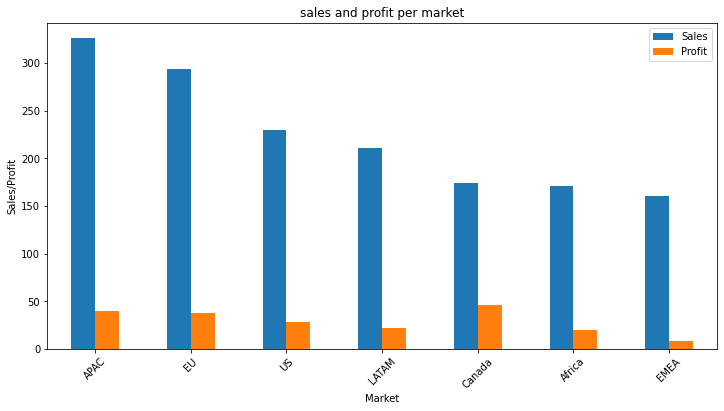

In [163]:
#plt.figure(figsize=(12,7), dpi=100)
sorting_market_per_sales.plot(kind="bar", title='sales and profit per market',
                             ylabel = 'Sales/Profit', figsize=(12,6), rot=45);

                              

The figure above gives and Indication that, the APAC market, produces the highest 
Sales amongst all the other markets.

In [179]:
#Top 5 performing products in the Canadian Market

canadian_market = data['Market'] == 'Canada'
market_in_canada = data[canadian_market]

highest_sales_products = market_in_canada.groupby(by=['Sub-Category'])[['Profit']].mean()
sorted_values = highest_sales_products.sort_values(by='Profit', ascending=False)
top_ten_perfo_products = sorted_values.head(10)
top_ten_perfo_products.style.background_gradient()

,Profit
Sub-Category,
Copiers,204.895385
Tables,150.090000
Appliances,139.623750
Phones,133.993500
Bookcases,103.271538
Chairs,71.395000
Accessories,68.174211
Storage,58.248600
Machines,46.753846


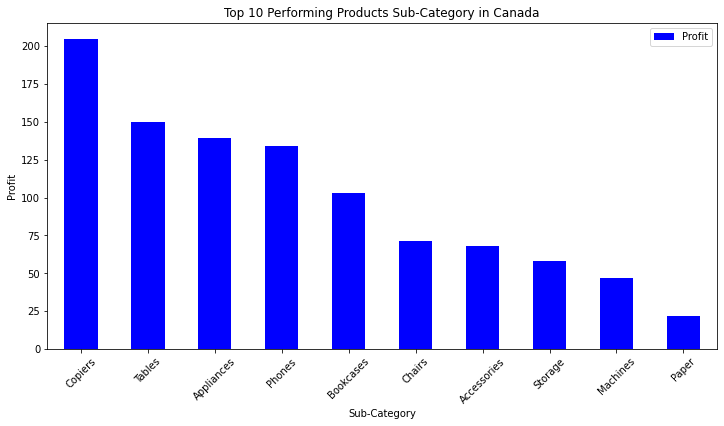

In [182]:
top_ten_perfo_products.plot(kind='bar', title='Top 10 Performing Products Sub-Category in Canada', rot=45, 
                            ylabel='Profit', figsize=(12,6), color='blue')
plt.show()

1. IT is analysed that, an Increase in the Sales will create huge impact in the profit margin.
2. Despite the fact that, it had a low record of sales, comparatively, it yielded the highest profit.
3. Hence the Canadian must be highly considered.

### Which products are the company made up of and which of them are discounted the most?

In [97]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Month', 'Month_name', 'unit_price',
       'discount_value'],
      dtype='object')

In [183]:
# The highest discounted products in the market and their effect on sales

discounted_products = data.groupby('Sub-Category')[['Discount','Sales','Profit', 'unit_price']].mean()
sorted_disc_on_prod = discounted_products.sort_values('Discount', ascending=False)
sorted_disc_on_prod.style.background_gradient()

,Discount,Sales,Profit,unit_price
Sub-Category,,,,
Tables,0.290732,879.258913,-74.429023,362.875401
Binders,0.179207,75.083145,11.776633,28.083121
Machines,0.169583,524.266532,39.614989,196.474415
Chairs,0.163110,437.298126,40.884178,147.620090
Bookcases,0.153758,608.283800,67.160688,210.359502
Furnishings,0.151066,121.633519,14.816223,40.673372
Phones,0.145847,508.437337,64.556749,169.793598
Appliances,0.141709,576.105017,80.729681,196.345345
Fasteners,0.140595,34.397651,4.762572,11.823707


**From the analysis made, we can deduce that, Customers are moved by the discount rate of a particular product,
as it is seen with Tables, as a sub_category. But that does not yield profit, so, I will recommend that the company focuses on giving more discount to Copiers sub_category.

In [98]:
total_discount = data['Discount'].sum()

In [99]:
 data['Discount'].apply(lambda x:(x/total_discount)*100)

0        0.000000
1        0.001364
2        0.000000
3        0.006822
4        0.001364
           ...   
51285    0.002729
51286    0.000000
51287    0.000000
51288    0.000000
51289    0.002729
Name: Discount, Length: 51290, dtype: float64

## Discount

In [38]:
discount_info = data.groupby("Sub-Category").mean()[['Discount','Sales','Profit','Shipping Cost']].sort_values('Discount', ascending=False).reset_index()

discount_info

,Sub-Category,Discount,Sales,Profit,Shipping Cost
0,Tables,0.290732,879.258913,-74.429023,92.754309
1,Binders,0.179207,75.083145,11.776633,7.831923
2,Machines,0.169583,524.266532,39.614989,53.254307
3,Chairs,0.163110,437.298126,40.884178,47.824651
4,Bookcases,0.153758,608.283800,67.160688,64.488689
5,Furnishings,0.151066,121.633519,14.816223,12.853981
6,Phones,0.145847,508.437337,64.556749,55.079765
7,Appliances,0.141709,576.105017,80.729681,61.709846
8,Fasteners,0.140595,34.397651,4.762572,3.741153
9,Storage,0.138464,222.788271,21.439314,23.828120


In [186]:
discount_info.corr()[['Sales','Discount', 'Shipping Cost']].style.highlight_max()

,Sales,Discount,Shipping Cost
Discount,0.576842,1.000000,0.570777
Sales,1.000000,0.576842,0.999574
Profit,0.246416,-0.570215,0.252789
Shipping Cost,0.999574,0.570777,1.000000


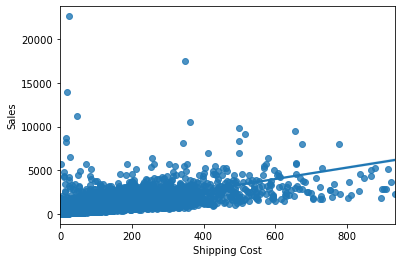

In [185]:
sns.regplot(data=data, x='Shipping Cost', y = 'Sales');

In [ ]:
data['Discount']

## 3. What are the States with the highest sales?

In [107]:
data['State']

0             Constantine
1         New South Wales
2                Budapest
3               Stockholm
4         New South Wales
               ...       
51285          California
51286    Souss-Massa-Draâ
51287             Managua
51288           Chihuahua
51289            Colorado
Name: State, Length: 51290, dtype: object

In [114]:
states_and_sales = data.groupby(['State','Sub-Category'])[['Sales','Profit']].mean()
sorted_states_and_sales = states_and_sales.sort_values('Sales', ascending=False)
sorted_states_and_sales.head()

,,Sales,Profit
State,Sub-Category,,
Delaware,Copiers,10499.970,5039.9856
Indiana,Copiers,9249.965,4424.9835
Tuscany,Appliances,7958.580,3979.0800
Bihar,Tables,5451.300,327.0600
Meknès-Tafilalet,Copiers,5301.240,2597.2800


In [188]:
states_and_sales = data.groupby('State')[['Sales','Profit']].mean()
sorted_states_and_sales = states_and_sales.sort_values('Sales', ascending=False)
top_ten_sales = sorted_states_and_sales.head(10)
top_ten_sales.style.background_gradient()

,Sales,Profit
State,,
Paysandú,3473.140000,868.120000
Elbasan,1619.100000,258.900000
Wyoming,1603.136000,100.196000
Qinghai,1422.862500,341.752500
Shizuoka,1326.695455,505.246364
Shumen,1272.600000,279.960000
Khulna,1140.702000,278.217000
Khorezm,1124.100000,146.100000
Maseru,1118.665000,233.035000


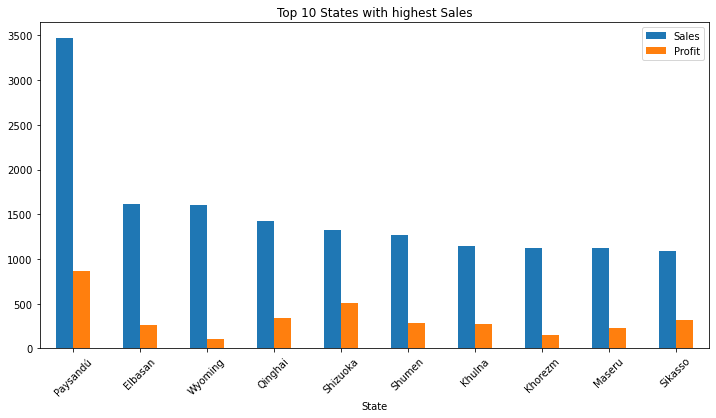

In [153]:
top_ten_sales.plot(kind='bar', title='Top 10 States with highest Sales', rot=45, figsize=(12,6))
plt.show()

Generally, considering the various states and their corresponding Sales, it's evident that 
Paysandu' is the state with the highest sales

In [108]:
sales_profit_per_market

,Market,Sales,Profit
0,APAC,325.917481,39.629163
1,EU,293.808906,37.282974
2,US,229.858001,28.656896
3,LATAM,210.278334,21.531328
4,Canada,174.292109,46.399453
5,Africa,170.868370,19.374674
6,EMEA,160.302508,8.728966


In [ ]:
apac_market = data[data['Market']=='APAC']


In [109]:
avg_apac_sales = apac_market.groupby('State')[['Sales']].mean().sort_values('Sales',ascending=False).head(10).reset_index()
avg_apac_sales

,State,Sales
0,Qinghai,1422.862500
1,Shizuoka,1326.695455
2,Khulna,1140.702000
3,Manipur,1085.868000
4,Mie,999.510000
5,Rajshahi,997.380000
6,Yamaguchi,950.682857
7,Sulawesi Tengah,840.761700
8,Nagasaki,825.084000
9,Kerala,646.780313


In [ ]:
#What products are bought the most in the states above?
#  Which products are perfoming well?
#  Which Segments have the highest sales?
#  Which of the Markets records the highest sales?

In [ ]:
apac_market[apac_market['State']== 'Qinghai'][['Product Name', 'Sub-Category','Quantity']]

##  Which products are perfoming well?

# To Do: Limiting the names of the X'axis

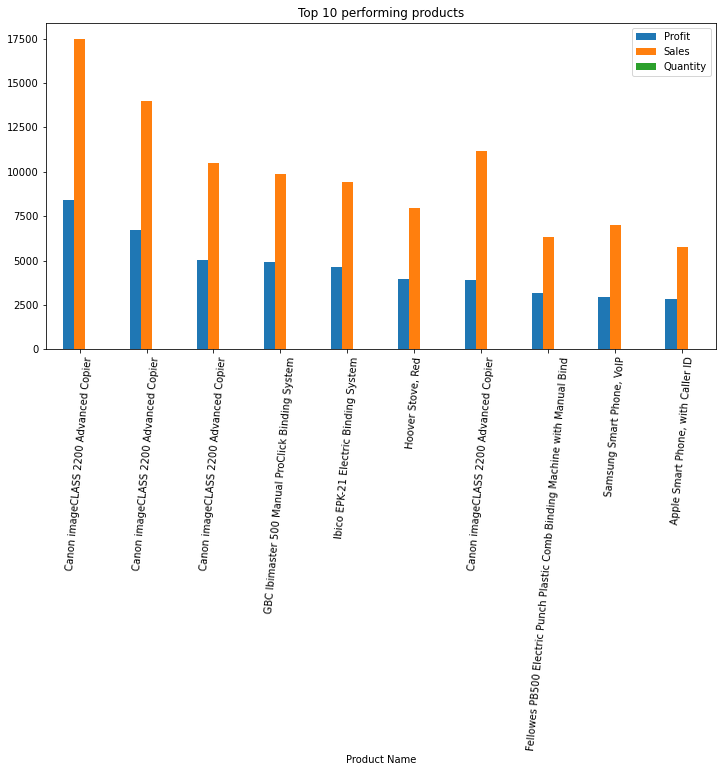

In [194]:
top_ten_perf = data[['Product Name','Sub-Category','Profit','Sales','Quantity','Market', 'State']].sort_values('Profit', 
                                                                                                ascending=False).reset_index().head(10)
# top_ten_perf['Rank']= top_ten_perf['Profit'].rank(ascending=False).astype('int')

# top_ten_perf.set_index('Rank', inplace = True)

top_ten_perf.set_index('Product Name', inplace = True)

top_ten_perf.drop('index',axis=1,inplace=True)

top_ten_perf.plot(kind='bar', rot=85, figsize=(12,6), title="Top 10 performing products")
plt.show()



##  Which Segments have the highest sales?

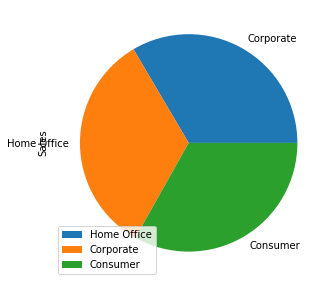

In [253]:
segment_with_high_sales = data.groupby('Segment')[['Sales']].mean().sort_values('Sales', ascending=False).head()
segment_with_high_sales.plot.pie(y='Sales', figsize=(10,5))
plt.legend(['Home Office', 'Corporate', 'Consumer'], loc="lower left")
plt.show()

In [ ]:
### Check: The following  possible questions may of interest to you.

1. What is the sales and profit per market? 

2. What is the most and least profitable market?

3. How are you going to increase the sales for the products that least bought?

4. Which month does the company records more sales?

5. What is the correlation between discount and sale?

6. Does the shipping cost affect the sales?

7. What is the dominant product category in each market?

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


## 4. Which month does the company records more sales?

In [125]:
data['Month'] =  data['Order Date'].dt.month
data['Month_name'] =  data['Order Date'].dt.month_name()

In [126]:
sales_per_month = data.groupby(['Month', 'Month_name']).sum()[['Sales']].reset_index()
sales_per_month

,Month,Month_name,Sales
0,1,January,7.757669e+05
1,2,February,7.228532e+05
2,3,March,9.513331e+05
3,4,April,8.516173e+05
4,5,May,9.764157e+05
5,6,June,1.152368e+06
6,7,July,8.387436e+05
7,8,August,1.247501e+06
8,9,September,1.244140e+06
9,10,October,1.120777e+06


In [132]:
# To Do: Give a label to the axis

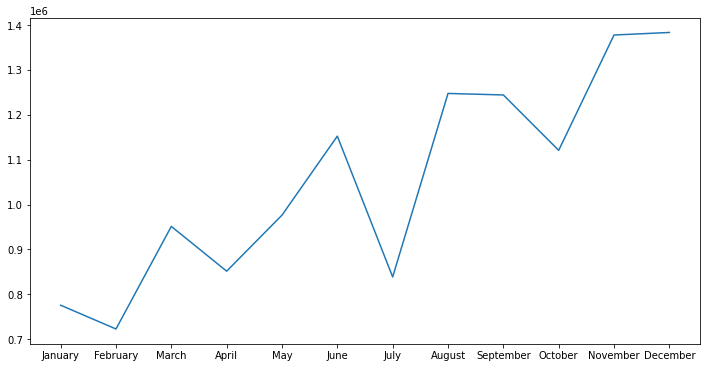

In [131]:
plt.figure(figsize=(12,6))
plt.plot(sales_per_month['Month_name'], sales_per_month['Sales']);


In [195]:
sales_per_month = data.groupby(['Month', 'Month_name']).mean()[['Sales']].reset_index()
sales_per_month.style.background_gradient()

,Month,Month_name,Sales
0,1,January,248.483956
1,2,February,246.960427
2,3,March,255.185913
3,4,April,243.388774
4,5,May,247.947100
5,6,June,235.561690
6,7,July,234.876381
7,8,August,264.581295
8,9,September,237.567257
9,10,October,250.901605


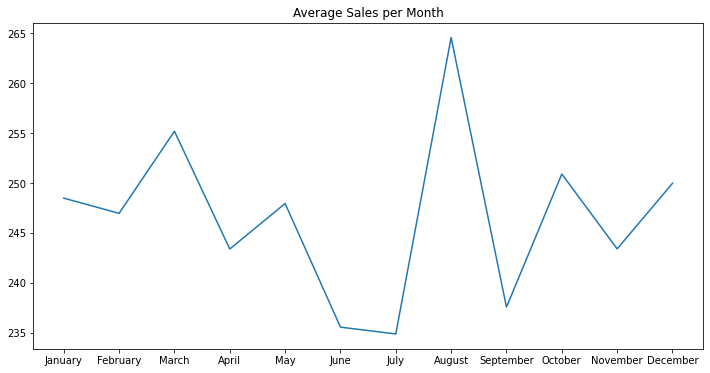

In [197]:
plt.figure(figsize=(12,6))
plt.title("Average Sales per Month")
plt.plot(sales_per_month['Month_name'], sales_per_month['Sales']);

In [208]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Month_name,unit_price,discount_value,number_of_days
0,object,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1,January,204.15,0.000,151.0
1,object,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1,January,44.58,13.374,212.0
2,object,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1,January,16.53,0.000,120.0


In [209]:
data[data['Product Name']== "Tenex Lockers, Blue"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Month_name,unit_price,discount_value,number_of_days
0,object,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3000,2,0.00,106.1400,35.46,Medium,1,January,204.15,0.0000,151.0
192,object,IN-2011-25070,2011-01-09,2011-06-09,Standard Class,MN-17935,Michael Nguyen,Consumer,Hefei,Anhui,China,APAC,North Asia,OFF-ST-10003295,Office Supplies,Storage,"Tenex Lockers, Blue",1429.0500,7,0.00,371.4900,194.36,High,1,January,204.15,0.0000,151.0
1150,object,SA-2011-1570,2011-04-08,2011-09-08,Standard Class,RH-9555,Ritsa Hightower,Consumer,Riyadh,Ar Riyad,Saudi Arabia,EMEA,EMEA,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",204.1500,1,0.00,53.0700,8.70,Medium,4,April,204.15,0.0000,153.0
1405,object,IZ-2011-2730,2011-05-09,2011-07-09,First Class,CA-2310,Christine Abelman,Corporate,Mosul,Ninawa,Iraq,EMEA,EMEA,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",204.1500,1,0.00,53.0700,23.68,High,5,May,204.15,0.0000,61.0
2655,object,IN-2011-27534,2011-09-11,2011-10-11,First Class,MH-17785,Maya Herman,Corporate,Bandung,Jawa Barat,Indonesia,APAC,Southeast Asia,OFF-ST-10003295,Office Supplies,Storage,"Tenex Lockers, Blue",677.7780,4,0.17,73.4580,153.25,High,9,September,204.15,138.8220,30.0
2845,object,IT-2011-4648014,2011-10-06,2011-06-16,Standard Class,AH-10075,Adam Hart,Corporate,Aprilia,Lazio,Italy,EU,South,OFF-ST-10004191,Office Supplies,Storage,"Tenex Lockers, Blue",489.9600,4,0.40,-114.3600,7.35,Medium,10,October,204.15,326.6400,-112.0
3518,object,CG-2011-9940,2011-12-12,2011-12-16,Standard Class,AZ-750,Annie Zypern,Consumer,Kinshasa,Kinshasa,Democratic Republic of the Congo,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",204.1500,1,0.00,53.0700,12.82,Medium,12,December,204.15,0.0000,4.0
4559,object,IT-2012-2733319,2012-03-12,2012-05-12,First Class,HA-14920,Helen Andreada,Consumer,Trieste,Friuli-Venezia Giulia,Italy,EU,South,OFF-ST-10004191,Office Supplies,Storage,"Tenex Lockers, Blue",122.4900,1,0.40,-28.5900,13.21,Critical,3,March,204.15,81.6600,61.0
4755,object,ES-2012-4868521,2012-04-08,2012-06-08,First Class,AH-10075,Adam Hart,Corporate,Flers,Lower Normandy,France,EU,Central,OFF-ST-10004191,Office Supplies,Storage,"Tenex Lockers, Blue",183.7350,1,0.10,32.6550,36.88,High,4,April,204.15,20.4150,61.0
5201,object,TU-2012-3470,2012-05-11,2012-05-11,Same Day,JL-5850,John Lucas,Consumer,Denizli,Denizli,Turkey,EMEA,EMEA,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",489.9600,6,0.60,-416.5200,94.14,High,5,May,204.15,734.9400,0.0


In [210]:
data['unit_price'] = data['Sales']/(data['Quantity']*(1-data['Discount']))

In [ ]:
data.head()

In [ ]:
data["discount_value"] = data['unit_price']*data['Discount']*data['Quantity']

In [ ]:
data.head(4)

In [ ]:
data[data['Product Name']== "Tenex Lockers, Blue"]

In [ ]:
data.corr()[['Sales','discount_value', "Profit"]].round(3)

## 6. Does the shipping cost affect the sales?

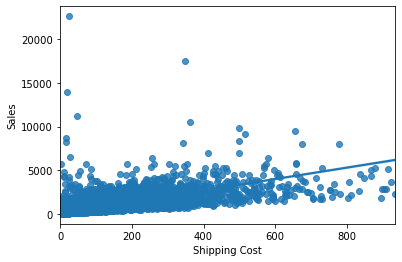

In [135]:
sns.regplot(data= data, x= "Shipping Cost", y="Sales");

COMMENT: from the regplot, we can deduce that shipping cost has an affect on the sales.

8. City with most orders for a given product category?

9. which products are making loss?

10. Which segment provides more profit?

11. what is the correlation between quantity and profit?

12. what it the correlation between shipping cost and profit?

13. Which order priority yields more sales?

14. What is the average shipping cost to each region?

15. What product categories should be targetted to the  different markets?

16. Does the interval between the order date and the shipping date affect sale and profit


In [ ]:
data['Markets']

<AxesSubplot:title={'center':'Dominating Product Categories per Market'}, xlabel='Market', ylabel='Sales'>

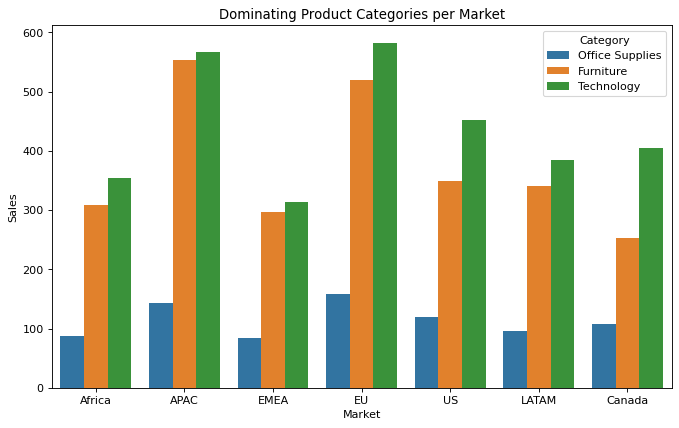

In [201]:
plt.figure(figsize=(10,6), dpi=80)
plt.title("Dominating Product Categories per Market")
sns.barplot(data=data, x= 'Market', y='Sales', hue='Category', ci=None)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

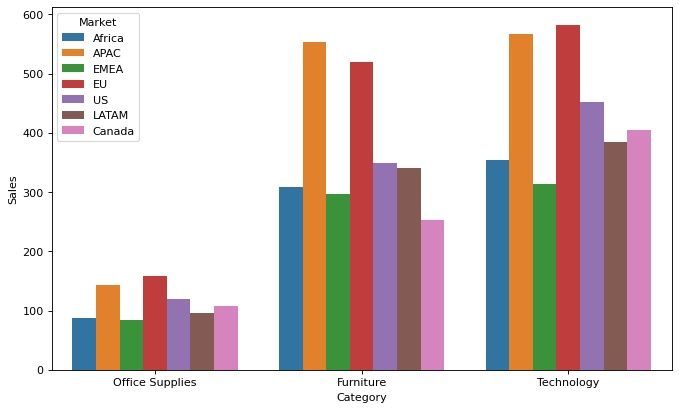

In [137]:
plt.figure(figsize=(10,6), dpi=80)
sns.barplot(data=data, x= 'Category', y='Sales', hue='Market', ci=None)

## 16. Does the interval between the order date and the shipping date affect sale and profit

In [138]:
interval_days = data['Ship Date'] - data['Order Date']
data['number_of_days']= interval_days

In [139]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month,Month_name,unit_price,discount_value,number_of_days
0,object,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1,January,204.15,0.000,151 days
1,object,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1,January,44.58,13.374,212 days
2,object,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1,January,16.53,0.000,120 days
3,object,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,1,January,29.91,44.865,120 days
4,object,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,1,January,25.26,12.630,212 days


In [140]:
data['number_of_days']= data['number_of_days'].astype('str')

data['number_of_days']= data['number_of_days'].str.strip('days').astype('float')

In [203]:
data.corr()[['number_of_days','Sales','Profit']].round(3).style.background_gradient()

,number_of_days,Sales,Profit
Sales,-0.001000,1.000000,0.485000
Quantity,-0.004000,0.314000,0.104000
Discount,0.001000,-0.087000,-0.316000
Profit,0.007000,0.485000,1.000000
Shipping Cost,-0.008000,0.768000,0.354000
Month,-0.423000,-0.000000,-0.005000
unit_price,-0.000000,0.779000,0.209000
discount_value,-0.005000,0.388000,-0.431000
number_of_days,1.000000,-0.001000,0.007000


In [142]:
data['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [143]:
order_priority_sales = data.groupby('Order Priority').sum()[['Sales']].sort_values('Sales',ascending=False).reset_index()
order_priority_sales

,Order Priority,Sales
0,Medium,7.280892e+06
1,High,3.807548e+06
2,Critical,9.862355e+05
3,Low,5.678259e+05


<AxesSubplot:xlabel='Order Priority', ylabel='Sales'>

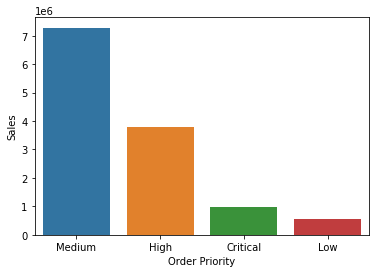

In [207]:
sns.barplot(data = order_priority_sales, x = 'Order Priority', y='Sales', ci=None)

In [ ]:
data['Region'].nunique()

In [166]:
#Top Ten Customers 

top_ten_customers = data.groupby('Customer Name')[['Sales']].mean().sort_values('Sales').head(10)
top_ten_customers

,Sales
Customer Name,
Vivian Mathis,108.117417
Thais Sissman,113.098157
Erin Creighton,116.061226
Catherine Glotzbach,117.577371
Allen Armold,118.885218
Karen Seio,123.836586
Sung Shariari,123.917786
Theresa Swint,125.968444
Joni Sundaresam,128.341623


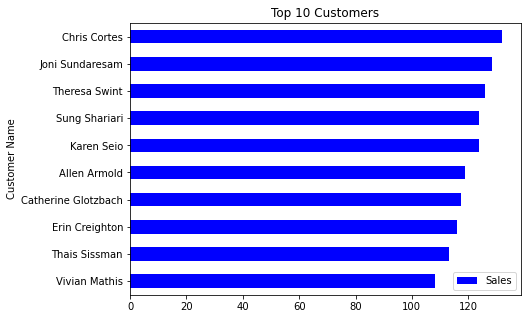

In [206]:
top_ten_customers.plot(kind='barh', title='Top 10 Customers', figsize=(7,5), color='Blue')
plt.show()